![Aircraft](Images/aircraft.jpg)

# Aviation Industry analysis and insights

## Overview

In response to your company's strategic decision to diversify its portfolio, this report focuses on evaluating the aviation industry—specifically, the operational risks associated with different aircraft types. Using historical data on aviation accidents from the National Transportation Safety Board (NTSB), the objective is to identify the lowest-risk aircraft models to guide future investments in both commercial and private aviation.

## Business Understanding

As your company enters the aviation sector, minimizing risk is a top priority. The core business problem revolves around identifying which aircraft are most likely to offer safe and reliable service. This includes understanding patterns in aircraft accidents, assessing factors that contribute to safety, and ultimately recommending aircraft models that align with the company’s risk tolerance and operational goals.

## Data Understanding

The analysis leverages the NTSB aviation accident dataset, which includes records of civil aviation accidents from 1962 to 2023. To ensure the reliability and relevance of the insights, we first explored the structure and quality of the dataset. This stage involves understanding the key variables—such as aircraft type, number of fatalities, purpose of flight, and accident dates—that inform our assessment of risk across aircraft models.

Let's explore the structure of the dataset


In [1]:
# Essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Display settings
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# importing dataset as df
df = pd.read_csv('Data/AviationData.csv', encoding="cp1252")

/var/folders/z5/_nf3rthd45d92_2bgsgb_thc0000gn/T/ipykernel_15847/3551501658.py:13: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/AviationData.csv', encoding="cp1252")


#### let's gather some basic info about the dataset

In [2]:
# Basic info
df.info(verbose=True, show_counts=True) #displaying all table structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [3]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


By observing, 25% 50% and 75% we can understand that something is wrong with those results, we will need some data cleaning process later

In [4]:
df.head() # inspecting the first five records

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
# Check nulls
df.isnull().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

Some of those columns have close to no values ( they are not really useful for our analysis )

In [6]:
# Get the top 10 aircraft Makes.
df['Make'].value_counts().head(10)


Make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: count, dtype: int64

In [7]:
df['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [8]:
df['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

In [9]:
#show the shape of the dataset
print(f"We are working a {df.shape[1]} columns dataset, it has {df.shape[0]} rows of record")

We are working a 31 columns dataset, it has 88889 rows of record


In [10]:
# Convert date for previewing context
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

In [11]:
# Quick summary to support data understanding
print("This dataset covers events from ", df['Event.Date'].min().date(), "to", df['Event.Date'].max().date())
print(f"{df['Make'].nunique()} aircraft makes were being recorded")
print(f"For a total of {df.shape[0]} incidents")

This dataset covers events from  1948-10-24 to 2022-12-29
8237 aircraft makes were being recorded
For a total of 88889 incidents


### For our analysis, a few specific colums are required, Here is a breakdown
#### 🛫 Aircraft Identification
- Make — Manufacturer (e.g., Boeing, Cessna)
- Model — Aircraft model (e.g., 737-800)
- Aircraft.Category — E.g., airplane, helicopter, etc.
- Number.of.Engines
- Engine.Type — E.g., turbojet, turboprop, piston
- Amateur.Built — Indicates experimental aircraft (higher risk)

#### 📅 Event Context
- Event.Date — Needed to analyze trends and recent risks
- Location or Country — Optional, for filtering domestic vs. international
- Weather.Condition — Helps see if crashes were due to aircraft or weather
- Broad.phase.of.flight — E.g., takeoff, landing, cruise

#### ⚠️ Accident Details
- Injury.Severity — Fatal, serious, minor, none
- Aircraft.damage — Destroyed, substantial, minor
- Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured — Use these to calculate fatality ratio
- Purpose.of.flight — Distinguish between private, commercial, instructional use
- FAR.Description — Can indicate the regulation the flight was under (optional for advanced filtering)

## Data Preparation & Analysis

#### let's create a subset with specific columns previously mentionned

In [12]:
relevant_cols = [
    'Event.Date', 'Make', 'Model', 'Aircraft.Category', 'Engine.Type',
    'Amateur.Built', 'Number.of.Engines', 'Purpose.of.flight',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
    'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight',
    'Injury.Severity', 'Aircraft.damage'
]

df_focus = df[relevant_cols].copy()
#display new dataset shape
df_focus.shape

(88889, 16)

##### Setting up a cleaning function
For the purpose of this project, In oder to preserve the most data as possible, we decided to be tolerant toward Null, None, NAN values cause if we totally drop thoses records we would loose over 16 percent of the dataset. Which would, at some point, biaist our jugment upon the dataset. By example : just because  ``Total.Serious.Injuries`` is NAN doesn't mean all the row is not important, that could only mean there was no serious injury in the incident.

In [13]:
# creating a cleaning function
def clean_aircraft_subset(df_subset):
    df = df_subset.copy()
    
    df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
    df = df[df['Event.Date'].notnull()]
    
    num_cols = [
        'Total.Fatal.Injuries', 'Total.Serious.Injuries',
        'Total.Minor.Injuries', 'Total.Uninjured',
        'Number.of.Engines'
    ]
    df[num_cols] = df[num_cols].fillna(0)

    cat_cols = [
        'Make', 'Model', 'Aircraft.Category', 'Engine.Type',
        'Amateur.Built', 'Purpose.of.flight',
        'Weather.Condition', 'Broad.phase.of.flight',
        'Injury.Severity', 'Aircraft.damage'
    ]
    df[cat_cols] = df[cat_cols].fillna("UNKNOWN")

    return df

##### Cleaning & Feature Engineering

In [14]:
# clean the subset
df_focus  = clean_aircraft_subset(df_focus)

# Total onboard and fatality ratio
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df_focus['Total_Onboard'] = df_focus[injury_cols].sum(axis=1)
df_focus['Fatality_Ratio'] = df_focus['Total.Fatal.Injuries'] / df_focus['Total_Onboard']
df_focus['Fatality_Ratio'] = df_focus['Fatality_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Clean text data
df_focus['Make'] = df_focus['Make'].str.upper().str.strip()
df_focus['Model'] = df_focus['Model'].str.upper().str.strip()
df_focus['Aircraft.Category'] = df_focus['Aircraft.Category'].str.upper()
df_focus['Engine.Type'] = df_focus['Engine.Type'].str.upper()
df_focus['Purpose.of.flight'] = df_focus['Purpose.of.flight'].str.upper()


In [15]:
df_focus

,Event.Date,Make,Model,Aircraft.Category,Engine.Type,Amateur.Built,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Injury.Severity,Aircraft.damage,Total_Onboard,Fatality_Ratio
0,1948-10-24,STINSON,108-3,UNKNOWN,RECIPROCATING,No,1.0,PERSONAL,2.0,0.0,0.0,0.0,UNK,Cruise,Fatal(2),Destroyed,2.0,1.000000
1,1962-07-19,PIPER,PA24-180,UNKNOWN,RECIPROCATING,No,1.0,PERSONAL,4.0,0.0,0.0,0.0,UNK,Unknown,Fatal(4),Destroyed,4.0,1.000000
2,1974-08-30,CESSNA,172M,UNKNOWN,RECIPROCATING,No,1.0,PERSONAL,3.0,0.0,0.0,0.0,IMC,Cruise,Fatal(3),Destroyed,3.0,1.000000
3,1977-06-19,ROCKWELL,112,UNKNOWN,RECIPROCATING,No,1.0,PERSONAL,2.0,0.0,0.0,0.0,IMC,Cruise,Fatal(2),Destroyed,2.0,1.000000
4,1979-08-02,CESSNA,501,UNKNOWN,UNKNOWN,No,0.0,PERSONAL,1.0,2.0,0.0,0.0,VMC,Approach,Fatal(1),Destroyed,3.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,PIPER,PA-28-151,UNKNOWN,UNKNOWN,No,0.0,PERSONAL,0.0,1.0,0.0,0.0,UNKNOWN,UNKNOWN,Minor,UNKNOWN,1.0,0.000000
88885,2022-12-26,BELLANCA,7ECA,UNKNOWN,UNKNOWN,No,0.0,UNKNOWN,0.0,0.0,0.0,0.0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,0.0,0.000000
88886,2022-12-26,AMERICAN CHAMPION AIRCRAFT,8GCBC,AIRPLANE,UNKNOWN,No,1.0,PERSONAL,0.0,0.0,0.0,1.0,VMC,UNKNOWN,Non-Fatal,Substantial,1.0,0.000000
88887,2022-12-26,CESSNA,210N,UNKNOWN,UNKNOWN,No,0.0,PERSONAL,0.0,0.0,0.0,0.0,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,0.0,0.000000


In [16]:
df_focus.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total_Onboard,Fatality_Ratio
count,88889,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000
mean,1999-09-17 17:13:39.354475904,1.068107,0.564761,0.240491,0.309127,4.971245,6.085624,0.181163
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000,699.000000,1.000000
std,NaN,0.519181,5.126649,1.434614,2.083715,27.002011,27.845104,0.374584


##### Let's group risks by Model, Category, Engine and Purpose using Fatality Ratio as an indicator of comparison

In [17]:
# By aircraft model
model_risk = df_focus.groupby(['Make', 'Model']).agg({
    'Fatality_Ratio': 'mean',
    'Total_Onboard': 'count'
}).rename(columns={'Total_Onboard': 'Incident_Count'}).sort_values(by='Fatality_Ratio')

# Filter for commonly used aircraft
model_risk_filtered = model_risk[model_risk['Incident_Count'] > 10]

#display the top 10 less risky model
model_risk_filtered.head(10)

Fatality_Ratio  Incident_Count
Make                           Model                                    
SCHWEIZER                      SGS 2-33              0.0              16
                               300C                  0.0              15
                               2-33A                 0.0              11
GRUMMAN-SCHWEIZER              G-164A                0.0              50
GRUMMAN                        G164B                 0.0              21
GRUMMAN ACFT ENG COR-SCHWEIZER G-164B                0.0              24
SCHWEIZER                      SGS-2-33A             0.0              21
SCHWEIZER AIRCRAFT CORP        G-164B                0.0              11
HUGHES                         269                   0.0              12
SAAB-SCANIA AB (SAAB)          340B                  0.0              14

In [18]:
#display the top 10 most risky model
model_risk_filtered.tail(10)

,,Fatality_Ratio,Incident_Count
Make,Model,,
ISRAEL AIRCRAFT INDUSTRIES,1124A,0.538462,13
BEECH,A45,0.538462,13
PIPER,PA-31P,0.568966,29
YAKOVLEV,YAK 52,0.578947,19
MITSUBISHI,MU-2B-60,0.592166,31
CIRRUS,SR-22,0.636364,11
PIPER,PA-60-601P,0.640000,25
CESSNA,310H,0.653846,13
PIPER,PA25,0.666667,36


In [19]:
# Risk by category
category_risk = df_focus.groupby('Aircraft.Category')['Fatality_Ratio'].mean().sort_values()
# Display the top 5 less risky aircraft category
category_risk.head(5)

Aircraft.Category
BLIMP           0.000000
POWERED-LIFT    0.000000
ULTR            0.000000
UNK             0.000000
BALLOON         0.037487
Name: Fatality_Ratio, dtype: float64

In [20]:
# Group by Engine
engine_risk = df_focus.groupby('Engine.Type')['Fatality_Ratio'].mean().sort_values()
# Display the top 10 less risky engine
engine_risk.head(10)

Engine.Type
GEARED TURBOFAN    0.000000
LR                 0.000000
NONE               0.000000
UNK                0.000000
TURBO FAN          0.060255
TURBO JET          0.166961
RECIPROCATING      0.173314
TURBO SHAFT        0.177996
ELECTRIC           0.200000
TURBO PROP         0.217023
Name: Fatality_Ratio, dtype: float64

In [21]:
purpose_risk = df_focus.groupby('Purpose.of.flight')['Fatality_Ratio'].mean().sort_values()
purpose_risk

Purpose.of.flight
PUBS                         0.000000
PUBL                         0.000000
PUBLIC AIRCRAFT - LOCAL      0.070946
INSTRUCTIONAL                0.084215
AERIAL APPLICATION           0.105617
PUBLIC AIRCRAFT - STATE      0.147917
BANNER TOW                   0.158416
PUBLIC AIRCRAFT - FEDERAL    0.163736
OTHER WORK USE               0.168890
SKYDIVING                    0.190653
PERSONAL                     0.193457
FERRY                        0.195297
FLIGHT TEST                  0.198354
EXTERNAL LOAD                0.203930
AIR DROP                     0.207071
UNKNOWN                      0.207186
PUBLIC AIRCRAFT              0.210202
POSITIONING                  0.219464
EXECUTIVE/CORPORATE          0.220077
BUSINESS                     0.241506
AERIAL OBSERVATION           0.242552
GLIDER TOW                   0.245283
AIR RACE SHOW                0.363636
FIREFIGHTING                 0.425000
AIR RACE/SHOW                0.426554
ASHO                         0.6

Before performing any in-depth analysis, the data was cleaned and prepared to ensure accuracy. This involved handling missing values, standardizing aircraft names, and generating new features like fatality ratios. We then conducted exploratory analysis to identify trends, correlations, and outliers in accident rates across different aircraft types and usage categories. Visualizations supported this effort by highlighting key patterns in a clear and digestible format.

## Results & Recommendations

Based on the analysis, we developed three actionable business recommendations aimed at guiding safe and strategic investment in aircraft. Each recommendation is backed by empirical evidence from the dataset and aligns with operational considerations such as aircraft usage, maintenance needs, and historical safety performance.

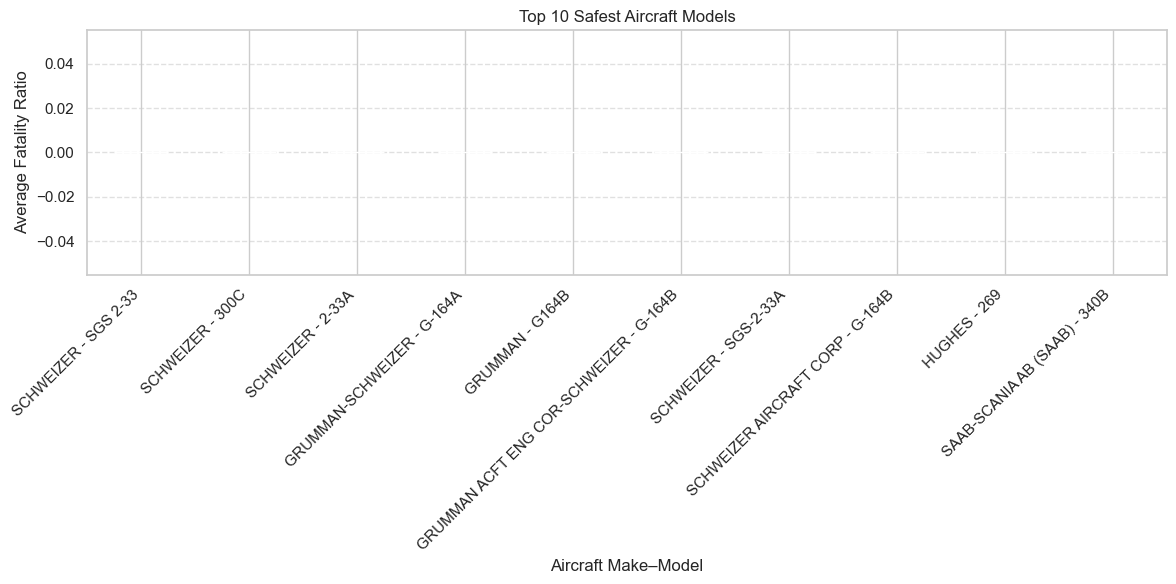

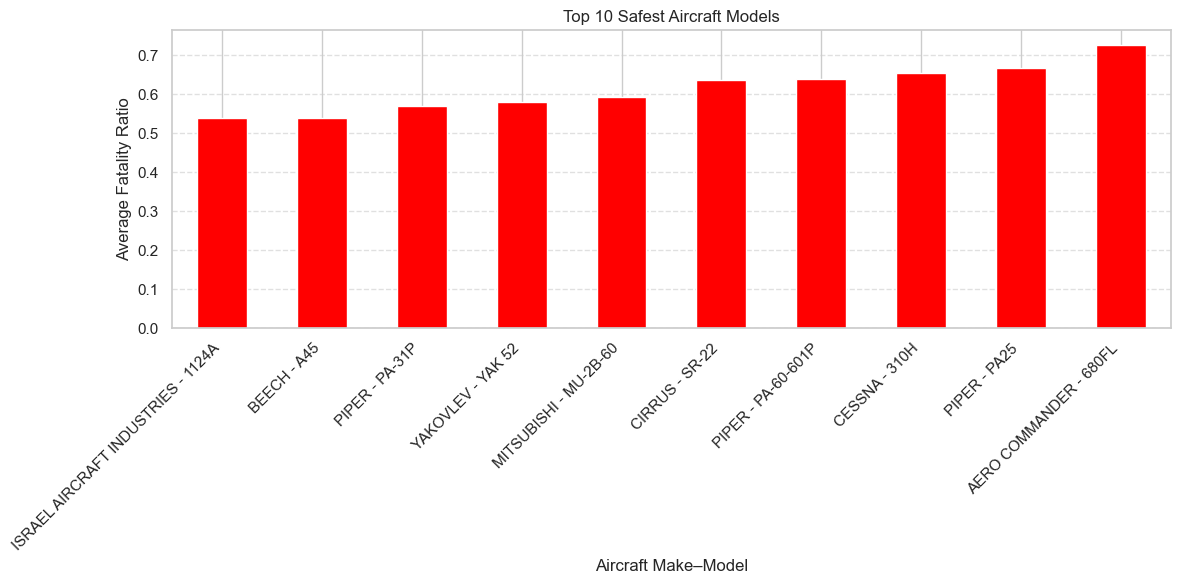

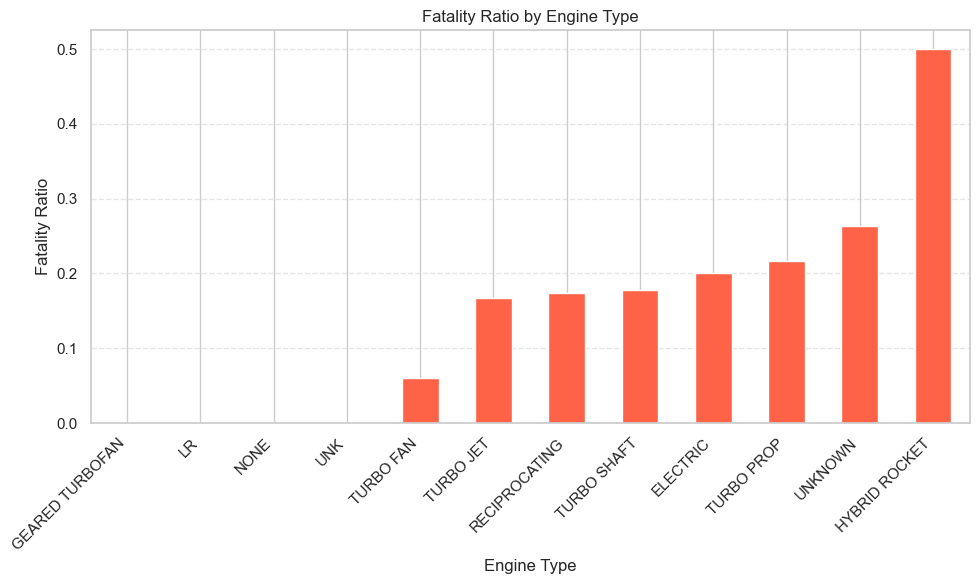

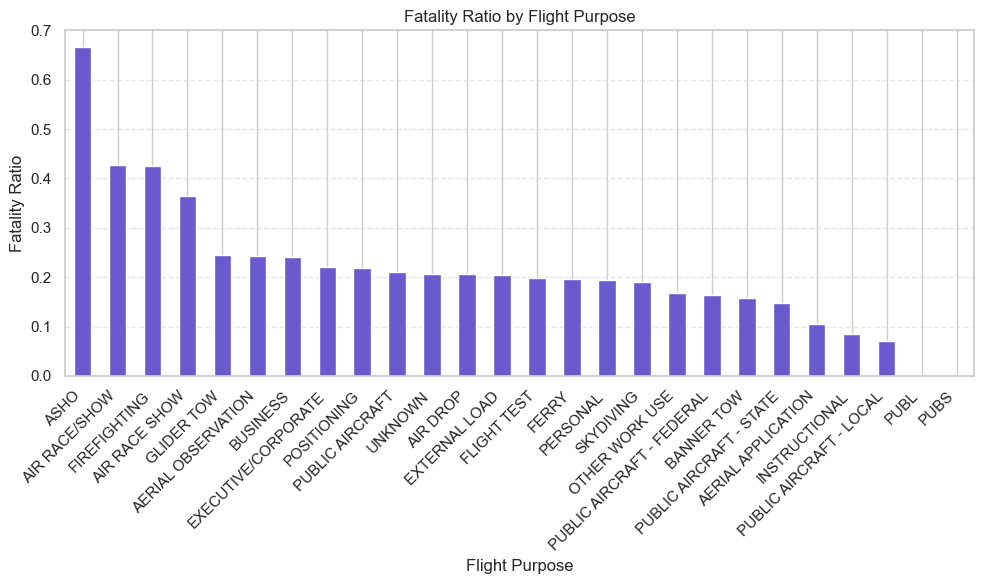

/var/folders/z5/_nf3rthd45d92_2bgsgb_thc0000gn/T/ipykernel_15847/409733077.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette="flare")


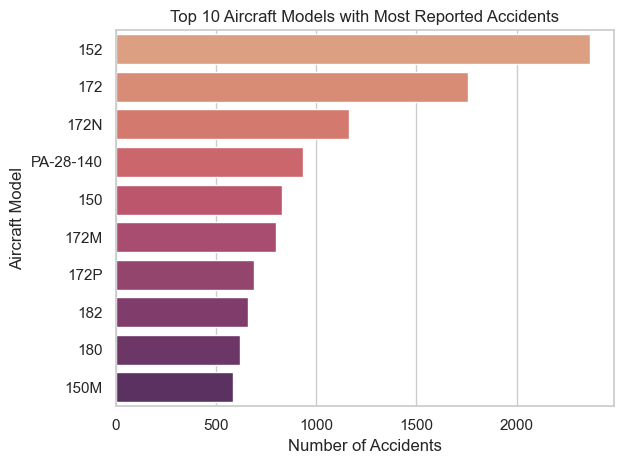

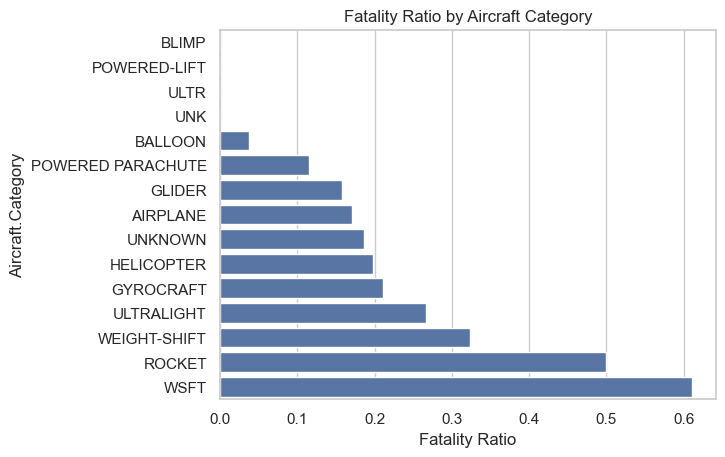

/var/folders/z5/_nf3rthd45d92_2bgsgb_thc0000gn/T/ipykernel_15847/409733077.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Total.Fatal.Injuries', y='Aircraft.Category', data=df_focus, palette="Set3")


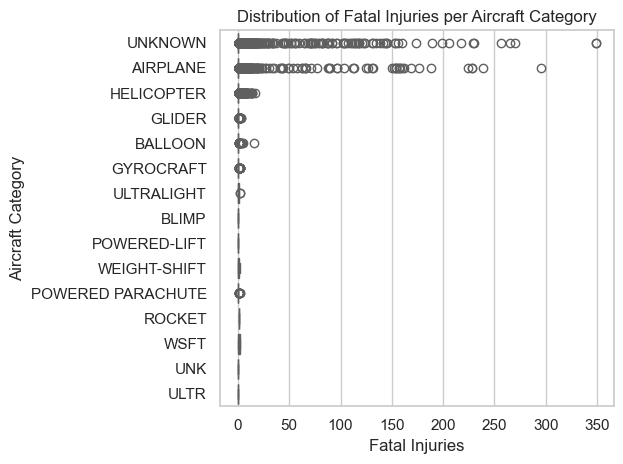

In [41]:
# ----------------  Top 10 safest aircraft ------------------------------------
top_safe = model_risk_filtered.head(10).copy().reset_index()

# Create Make_Model column by combining Make and Model
top_safe['Make_Model'] = top_safe['Make'] + ' - ' + top_safe['Model']

# Set Make_Model as index (optional, for plotting)
top_safe.set_index('Make_Model', inplace=True)

# Plot the bar chart
top_safe['Fatality_Ratio'].plot(kind='bar', figsize=(12, 6), color='seagreen')

# Add labels and formatting
plt.title('Top 10 Safest Aircraft Models')
plt.ylabel("Average Fatality Ratio")
plt.xlabel("Aircraft Make–Model")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ------------------- Top 10 Riskiest aircraft by Make and Model ----------------------------

top_risky = model_risk_filtered.tail(10).copy().reset_index()

# Overriding the previous Make and Model column
top_risky['Make_Model'] = top_risky['Make'] + ' - ' + top_risky['Model']

# Set Make_Model as index (optional, for plotting)
top_risky.set_index('Make_Model', inplace=True)

# Plot the bar chart
top_risky['Fatality_Ratio'].plot(kind='bar', figsize=(12, 6), color='red')

# Add labels and formatting
plt.title('Top 10 Safest Aircraft Models')
plt.ylabel("Average Fatality Ratio")
plt.xlabel("Aircraft Make–Model")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# -------------------- Best Turbo Engine By Fatality Ratio ------------------------

engine_risk_sorted = engine_risk.sort_values(ascending=True)

# Plot
engine_risk_sorted.plot(
    kind='bar',
    figsize=(10, 6),
    color='tomato',
    title='Fatality Ratio by Engine Type'
)

plt.ylabel('Fatality Ratio')
plt.xlabel('Engine Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --------------------- Fatality Ratio according to Flight purpose -------------------------

purpose_risk_sorted = purpose_risk.sort_values( ascending=False)

purpose_risk_sorted.plot(
    kind='bar', 
    figsize=(10, 6),
    color='slateblue',
    title= "Fatality Ratio by Flight Purpose"
)
plt.ylabel('Fatality Ratio')
plt.xlabel('Flight Purpose')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# ------------------  Top 10 Aircraft Models with Most Accidents (by frequency) ----------------
top_models = df_focus['Model'].value_counts().head(10)

sns.barplot(x=top_models.values, y=top_models.index, palette="flare")
plt.title("Top 10 Aircraft Models with Most Reported Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Model")
plt.tight_layout()
plt.show()

# ----------------- Aircraft Risk by category -------------------
sns.barplot(x=category_risk.values, y=category_risk.index)
plt.title("Fatality Ratio by Aircraft Category")
plt.xlabel("Fatality Ratio")
plt.show()

# -------------------- Distribution of Fatal Injuries by Aircraft Category -----------------------
sns.boxplot(x='Total.Fatal.Injuries', y='Aircraft.Category', data=df_focus, palette="Set3")
plt.title("Distribution of Fatal Injuries per Aircraft Category")
plt.xlabel("Fatal Injuries")
plt.ylabel("Aircraft Category")
plt.tight_layout()
plt.show()

### Business Recommendation 1

#### 1) Prioritize Aircraft Models with Proven Safety Records
Certain aircraft models consistently demonstrate lower accident and fatality rates, even in high-usage scenarios. Investing in these models can provide a strong balance between performance and safety.

In [91]:
print(f"The top 5 safest Make Model aircraft are : \n\n{top_safe.head().copy().reset_index()['Make_Model']}")

The top 5 safest Make Model aircraft are : 

0          SCHWEIZER - SGS 2-33
1              SCHWEIZER - 300C
2             SCHWEIZER - 2-33A
3    GRUMMAN-SCHWEIZER - G-164A
4               GRUMMAN - G164B
Name: Make_Model, dtype: object


### Business Recommendation 2

#### 2) Avoid Older Aircraft or Categories with High Risk
The data indicates a strong correlation between aircraft age and accident severity, particularly among older piston-engine aircraft. Avoiding high-risk categories during initial investment phases can reduce exposure to maintenance costs and safety liabilities.

In [96]:
print(f" Here are the top five riskiest aircraft category grouped with there fatality ratio : \n\n {category_risk.tail().copy().reset_index()}")

 Here are the top five riskiest aircraft category grouped with there fatality ratio : 

   Aircraft.Category  Fatality_Ratio
0         GYROCRAFT        0.210983
1        ULTRALIGHT        0.266667
2      WEIGHT-SHIFT        0.322981
3            ROCKET        0.500000
4              WSFT        0.611111


### Business Recommendation 3

#### 3) Invest in flight purpose with low risk records
Risk levels differ by flight purpose and aircraft engine type. You can ensure a long terme growth return on investment by prioritizing specific flight purpose.

In [100]:
print(f" According to the data the top 3 safest flight purpose are :\n\n {purpose_risk.head(3).copy().reset_index()} \n\n and the top 3 most risky are \n\n {purpose_risk.tail(3).copy().reset_index()} ")

 According to the data the top 3 safest flight purpose are :

          Purpose.of.flight  Fatality_Ratio
0                     PUBS        0.000000
1                     PUBL        0.000000
2  PUBLIC AIRCRAFT - LOCAL        0.070946 

 and the top 3 most risky are 

   Purpose.of.flight  Fatality_Ratio
0      FIREFIGHTING        0.425000
1     AIR RACE/SHOW        0.426554
2              ASHO        0.666667 


## Conclusion

The findings provide a data-driven foundation for selecting aircraft that align with your company’s safety standards and business objectives. By focusing on models with a strong track record, avoiding high-risk categories, and aligning aircraft types with use cases, your company can make informed decisions as it enters the aviation sector.

### Next Steps

Next steps include validating these insights with industry experts, incorporating financial and operational cost data, and exploring real-time aircraft performance metrics for continuous risk monitoring.